In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('img_meta.csv')

In [3]:
df.head()

,id,name,type,w,h,dataset,diagnosis,diagnosis_confirm_type,diagnosis_another,age,sex,Unnamed: 11
0,5436e3abbae478396759f0cf,ISIC_0000000,dermoscopic,1022,767,UDA-1,nevus,None,dysplastic nevus,55,female,NaN
1,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,UDA-1,nevus,None,dysplastic nevus,30,female,NaN
2,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,UDA-1,melanoma,histopathology,Melanoma in situ,60,female,NaN
3,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,UDA-1,nevus,None,dysplstic nevus,30,male,NaN
4,5436e3acbae478396759f0d7,ISIC_0000004,dermoscopic,1022,767,UDA-1,melanoma,histopathology,Melanoma,80,male,NaN


In [4]:
df.drop(df[df['dataset'] != 'HAM10000'].index, inplace=True)
df.reset_index(inplace=True)

In [5]:
df.drop(['diagnosis_another', 'Unnamed: 11'], axis=1, inplace=True)

In [6]:
df.drop('index', axis=1, inplace=True)

In [17]:
df

,id,name,type,w,h,dataset,diagnosis,diagnosis_confirm_type,age,sex
0,5aaf12491165976913627e89,ISIC_0024306,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,45,male
1,5aaf12491165976913627e95,ISIC_0024307,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,50,male
2,5aaf12491165976913627ea0,ISIC_0024308,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,55,female
3,5aaf12491165976913627eab,ISIC_0024309,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,40,male
4,5aaf12491165976913627eb6,ISIC_0024310,dermoscopic,600,450,HAM10000,melanoma,histopathology,60,male
5,5aaf12491165976913627ec1,ISIC_0024311,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,75,female
6,5aaf12491165976913627ecc,ISIC_0024312,dermoscopic,600,450,HAM10000,pigmented benign keratosis,histopathology,75,male
7,5aaf124a1165976913627edf,ISIC_0024313,dermoscopic,600,450,HAM10000,melanoma,histopathology,50,female
8,5aaf124a1165976913627eee,ISIC_0024314,dermoscopic,600,450,HAM10000,nevus,histopathology,75,male
9,5aaf124a1165976913627ef9,ISIC_0024315,dermoscopic,600,450,HAM10000,melanoma,histopathology,55,male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
id                        10015 non-null object
name                      10015 non-null object
type                      10015 non-null object
w                         10015 non-null int64
h                         10015 non-null int64
dataset                   10015 non-null object
diagnosis                 10015 non-null object
diagnosis_confirm_type    10015 non-null object
age                       9962 non-null object
sex                       10015 non-null object
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


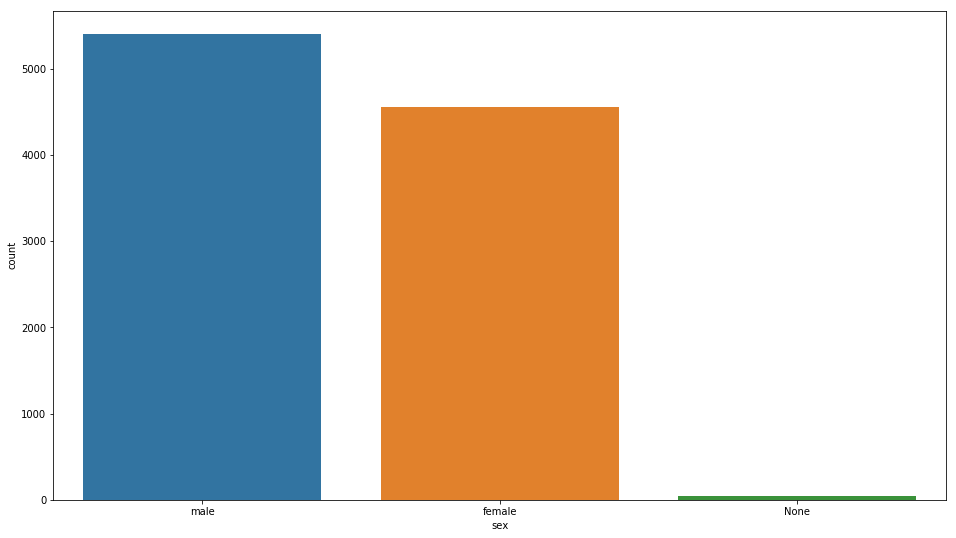

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(df['sex']);

In [10]:
diag_conf = list(df['diagnosis_confirm_type'].unique())
diag_conf

['serial imaging showing no change',
 'histopathology',
 'single image expert consensus',
 'confocal microscopy with consensus dermoscopy']

In [11]:
df['age'].fillna(0, inplace=True)

In [12]:
df['age'] = df['age'].astype(int)

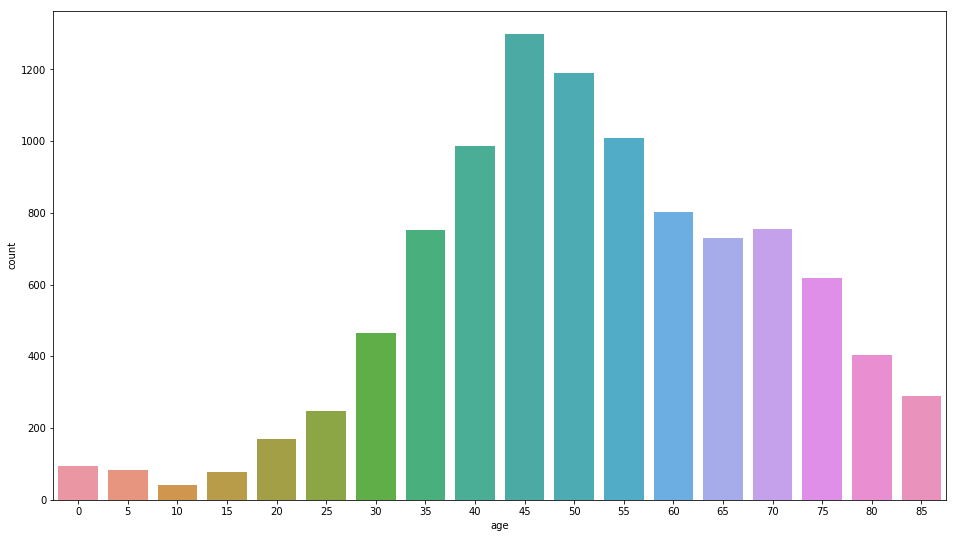

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(df['age']);

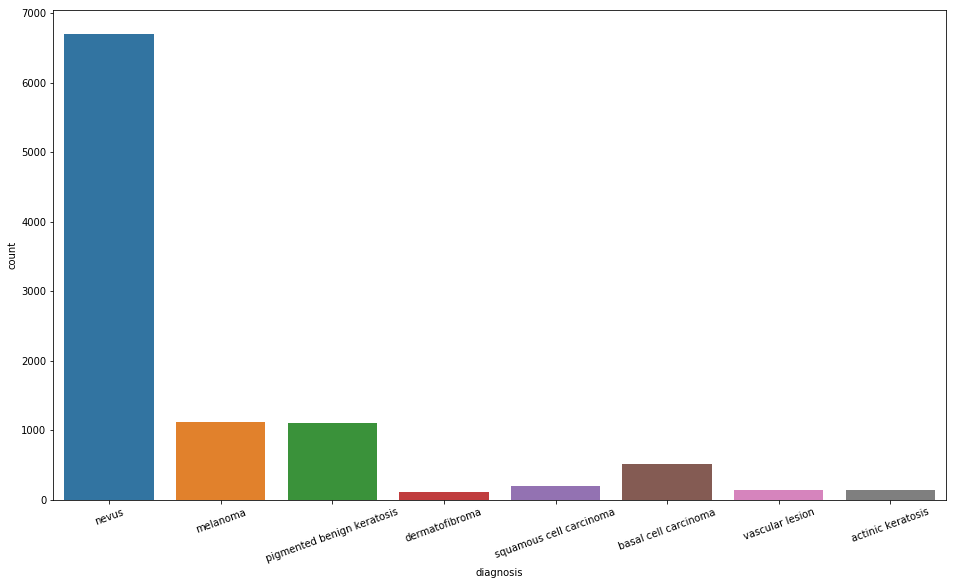

In [14]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=20)
sns.countplot(df['diagnosis']);

In [15]:
df.to_csv('training.csv')

In [16]:
img_ids = list(df['id'])
img_names = list(df['name'])
imageList = dict(zip(img_ids, img_names))

In [61]:
import requests

class ISICApi(object):
    def __init__(self, hostname='https://isic-archive.com',
                 username=None, password=None):
        self.baseUrl = f'{hostname}/api/v1'
        self.authToken = None

        if username is not None:
            if password is None:
                password = input(f'Password for user "{username}":')
            self.authToken = self._login(username, password)

    def _makeUrl(self, endpoint):
        return f'{self.baseUrl}/{endpoint}'

    def _login(self, username, password):
        authResponse = requests.get(
            self._makeUrl('user/authentication'),
            auth=(username, password)
        )
        if not authResponse.ok:
            raise Exception(f'Login error: {authResponse.json()["message"]}')

        authToken = authResponse.json()['authToken']['token']
        return authToken

    def get(self, endpoint):
        url = self._makeUrl(endpoint)
        headers = {'Girder-Token': self.authToken} if self.authToken else None
        return requests.get(url, headers=headers)

    def getJson(self, endpoint):
        return self.get(endpoint).json()

    def getJsonList(self, endpoint):
        endpoint += '&' if '?' in endpoint else '?'
        LIMIT = 50
        offset = 0
        while True:
            resp = self.get(
                f'{endpoint}limit={LIMIT:d}&offset={offset:d}'
            ).json()
            if not resp:
                break
            for elem in resp:
                yield elem
            offset += LIMIT

In [66]:
api = ISICApi(username="dmitry@gurov.co", password="Lbvfvelfr1")

import urllib
import os
savePath = 'img/'

if not os.path.exists(savePath):
    os.makedirs(savePath)

print('Downloading %s images' % len(imageList))
for image in imageList:
	imageFileResp = api.get('image/%s/download' % image)
	imageFileResp.raise_for_status()
	imageFileOutputPath = os.path.join(savePath, '%s.jpg' % imageList[image])
	with open(imageFileOutputPath, 'wb') as imageFileOutputStream:
	    for chunk in imageFileResp:
	        imageFileOutputStream.write(chunk)
print('Done')

Done
